In [1]:
import PIL.Image
import numpy as np
from scipy import linalg

In [31]:
g = np.genfromtxt("../data/G-1.csv", dtype=float, delimiter=",")

In [3]:
H = np.genfromtxt("../data/H-1.csv", dtype="f4", delimiter=",")

In [39]:
def cgne(H, g):
    f = np.zeros(3600, dtype=float)
    r = linalg.blas.sgemv(-1.0, H, f, beta=1.0, y=g)
    p = linalg.blas.sgemv(1.0, H, r, trans=1)
    for i in range(0, 20):
        rdot = linalg.blas.sdot(r, r)
        alpha = rdot/linalg.blas.sdot(p, p)
        f = linalg.blas.saxpy(p, f, a=alpha)
        r = linalg.blas.sgemv(-alpha, H, p, beta=1.0, y=r)
        beta = linalg.blas.sdot(r, r)/rdot
        p = linalg.blas.sgemv(1.0, H, r, beta=beta, y=p, trans=1)
    return f



In [40]:
img = cgne(H, g)

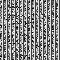

In [48]:
img = img.reshape(60, 60)
#img = (img - np.min(img))/np.ptp(img)
#img = img*255
PIL.Image.fromarray(img, mode="L")